In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from copy import deepcopy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

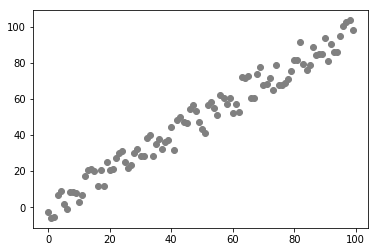

In [2]:
total_data = 100

x = np.arange(total_data)

np.random.shuffle(x)

delta = np.random.uniform(-10, 10, size = (total_data,))

y = x + delta

plt.scatter(x, y, color = 'gray')

plt.xticks()
plt.yticks()

plt.show()

In [3]:
training_size = 0.8

total = x.shape[0]

training_size = round(total * training_size)
validation_size = total - training_size

training_x = x[:training_size]
validation_x = x[training_size:]

training_X = training_x.reshape((training_size, 1))
validation_X = validation_x.reshape((validation_size, 1))

training_y = y[:training_size]
validation_y = y[training_size:]

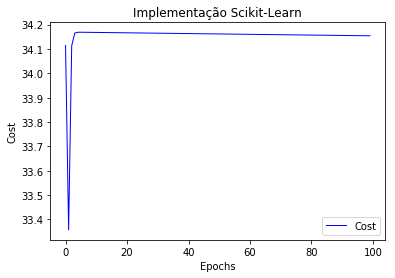

Best Epoch: [1, 33.35697043732132]
Cross Validation Accuracies:  [0.94073719 0.9736274  0.96009416 0.95082557 0.96976748]
Cross Validation Mean Accuracy:  0.9590103604579208
Mean Squared Error: 34.154187131975981
Linear Regression Accuracy:  0.9478928131005021


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [4]:
total_epoch = 100

epochs = []

r = linear_model.SGDRegressor(loss = "squared_loss",
                              shuffle = False,
                              max_iter = 100, 
                              fit_intercept = True,
                              learning_rate = "constant",
                              penalty = None,
                              eta0 = 0.00001)

select = float('inf')
best_epoch = None
best_model = None

for epoch in range(total_epoch):

    r.partial_fit(training_X, training_y)
    prediction_y = r.predict(validation_X)
    mse = mean_squared_error(validation_y, prediction_y)
    
    if(mse < select):
        
        select = mse
        best_epoch = [epoch, mse]
        best_model = deepcopy(r)
    
    epochs.append([epoch, mse])

epoch_df = pd.DataFrame(data = epochs, columns = ['Epoch', 'Cost'])

plt.plot(epoch_df['Epoch'], epoch_df['Cost'], linewidth = 1.0, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.title("Implementação Scikit-Learn")
plt.legend()

plt.show()

print("Best Epoch: " + str(best_epoch))

predict_y = best_model.predict(validation_X)

accuracies = cross_val_score(estimator = best_model, X = training_X, y = training_y, cv = 5,verbose = 1)

print("Cross Validation Accuracies: ", accuracies)
print("Cross Validation Mean Accuracy: ", accuracies.mean())

print("Mean Squared Error: %.15f" % mean_squared_error(validation_y, prediction_y))
print('Linear Regression Accuracy: ', r.score(validation_X, validation_y))

In [5]:
class SGDRegressor:
    
    def __init__(self, max_iter = 1000, fit_intercept = False, eta0 = 0.01):
        
        self.max_iter = max_iter
        self.fit_intercept = fit_intercept
        self.eta0 = eta0
        
        self.coef_ = np.array([]) 
        self.intercept_ = np.array([0])
        
    def fit(self, X, y):
        
        self.intercept_ = np.zeros(1)
        self.coef_ = np.zeros(X.shape[1])
            
        for iteration in range(self.max_iter):
            
            for inputs, target in zip(X, y):

                if (self.fit_intercept):

                    output = np.dot(self.coef_, inputs) + self.intercept_

                    self.intercept_ = self.intercept_ - (self.eta0 * (output - target))
                    self.coef_ = self.coef_ - (self.eta0 * (output - target) * inputs)

                else:

                    outputs = np.dot(self.coef_, inputs) + self.intercept_

                    self.coef_ = self.coef_ - (self.eta0 * (outputs - targets) * inputs)
    
    
    def partial_fit(self, X, y):
        
        if (not self.intercept_.any()):
            self.intercept_ = np.zeros(1)
        
        if (not self.coef_.any()):
            self.coef_ = np.zeros(X.shape[1])
                
        for inputs, target in zip(X, y):
            
            if (self.fit_intercept):
            
                output = np.dot(self.coef_, inputs) + self.intercept_
                
                self.intercept_ = self.intercept_ - (self.eta0 * (output - target))
                
                self.coef_ = self.coef_ - (self.eta0 * (output - target) * inputs)
                
            else:
                
                output = np.dot(self.coef_, inputs) + self.intercept_
                
                self.coef_ = self.coef_ - (self.eta0 * (output - target) * inputs)
    
                
    def predict(self, X):
        
        outputs = np.array([])
        
        for inputs in X:
            
            output = 0
            
            if (self.fit_intercept):
                
                output = np.dot(self.coef_, inputs) + self.intercept_
                
            else:
                
                output = np.dot(self.coef_, inputs)
            
            outputs = np.append(outputs, [output])
        
        return outputs
    
    def score(self, X, y):
        
        predicted_y = self.predict(X)
        
        u = ((y - predicted_y) ** 2).sum() 
        v = ((y - y.mean()) ** 2).sum()
        
        return (1 - u/v)
    
    def get_params(self, deep = True):
        
        dictionary = {
            'eta0': self.eta0,
            'fit_intercept': self.fit_intercept,
            'max_iter': self.max_iter,
        }
        
        return dictionary

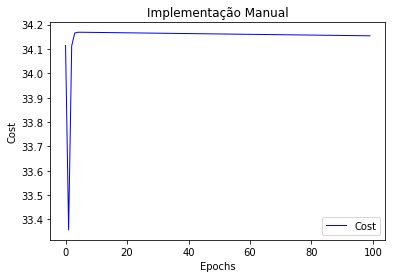

Best Epoch: [1, 33.35697043732132]
Cross Validation Accuracies:  [0.94073719 0.9736274  0.96009416 0.95082557 0.96976748]
Cross Validation Mean Accuracy:  0.9590103604579208
Mean Squared Error: 34.154187131975981
Linear Regression Accuracy:  0.9478928131005021


In [6]:
total_epoch = 100

epochs = []

r = SGDRegressor(max_iter = 100, 
                 fit_intercept = True, 
                 eta0 = 0.00001)

select = float('inf')
best_epoch = None
best_model = None

for epoch in range(total_epoch):

    r.partial_fit(training_X, training_y)
    prediction_y = r.predict(validation_X)
    mse = mean_squared_error(validation_y, prediction_y)
    
    if(mse < select):
        
        select = mse
        best_epoch = [epoch, mse]
        best_model = deepcopy(r)
    
    epochs.append([epoch, mse])

epoch_df = pd.DataFrame(data = epochs, columns = ['Epoch', 'Cost'])

plt.plot(epoch_df['Epoch'], epoch_df['Cost'], linewidth = 1.0, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.title("Implementação Manual")
plt.legend()

plt.show()

print("Best Epoch: " + str(best_epoch))

predict_y = best_model.predict(validation_X)

accuracies = cross_val_score(estimator = best_model, X = training_X, y = training_y, cv = 5)

print("Cross Validation Accuracies: ", accuracies)
print("Cross Validation Mean Accuracy: ", accuracies.mean())

print("Mean Squared Error: %.15f" % mean_squared_error(validation_y, prediction_y))
print('Linear Regression Accuracy: ', r.score(validation_X, validation_y))

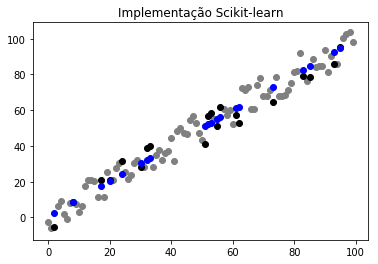

Cross Validation Accuracies:  [0.94100064 0.97365287 0.96007662 0.95191786 0.97083026]
Cross Validation Mean Accuracy:  0.9594956504686275
Mean Squared Error: 33.318089380868557
Linear Regression Accuracy:  0.9491684019943281


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [7]:
r = linear_model.LinearRegression(fit_intercept = True)

r.fit(training_X, training_y)

prediction_y = r.predict(validation_X)

plt.scatter(training_X[:, 0:1], training_y, color = 'grey')
plt.scatter(validation_X[:, 0:1], validation_y, color = 'black')
plt.scatter(validation_X[:, 0:1], prediction_y, color = 'blue')

plt.xticks()
plt.yticks()

plt.title("Implementação Scikit-learn")

plt.show()

accuracies = cross_val_score(estimator = r, X = training_X, y = training_y, cv = 5,verbose = 1)

#print("Coefficients: ", r.coef_)
#print("Intecepts: ", r.intercept_)
print("Cross Validation Accuracies: ", accuracies)
print("Cross Validation Mean Accuracy: ", accuracies.mean())

print("Mean Squared Error: %.15f" % mean_squared_error(validation_y, prediction_y))
print('Linear Regression Accuracy: ', r.score(validation_X, validation_y))

In [8]:
class LinearRegression:
    
    def __init__(self, fit_intercept = True):
        
        self.fit_intercept = fit_intercept
        
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        
        X_b = X
        
        if (self.fit_intercept):
            
            X_b = np.insert(X, 0, 1, axis = 1)
            
            coefficients = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        
            self.intercept_ = coefficients[0]
            self.coef_ = coefficients[1:]
            
        else:
            
            coefficients = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
            
            self.intercept_ = 0.0
            self.coef_ = coefficients
            
            
    
    def predict(self, X):
        
        outputs = np.array([])
        
        for inputs in X:
            
            output = 0
            
            output = np.dot(self.coef_, inputs) + self.intercept_
                
            outputs = np.append(outputs, [output])
        
        return outputs
        
    def score(self, X, y):
        
        predicted_y = self.predict(X)
        
        u = ((y - predicted_y) ** 2).sum() 
        v = ((y - y.mean()) ** 2).sum()
        
        return (1 - u/v)
        
    def get_params(self, deep = True):
        
        dictionary = {
            'fit_intercept': self.fit_intercept
        }
        
        return dictionary

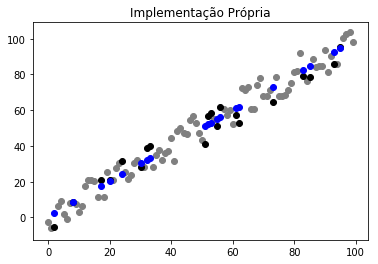

Cross Validation Accuracies:  [0.94100064 0.97365287 0.96007662 0.95191786 0.97083026]
Cross Validation Mean Accuracy:  0.9594956504686266
Mean Squared Error: 33.318089380868670
Linear Regression Accuracy:  0.949168401994328


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [9]:
r = LinearRegression(fit_intercept = True)

r.fit(training_X, training_y)

prediction_y = r.predict(validation_X)

plt.scatter(training_X[:, 0:1], training_y, color = 'grey')
plt.scatter(validation_X[:, 0:1], validation_y, color = 'black')
plt.scatter(validation_X[:, 0:1], prediction_y, color = 'blue')

plt.xticks()
plt.yticks()

plt.title("Implementação Própria")

plt.show()

accuracies = cross_val_score(estimator = r, X = training_X, y = training_y, cv = 5,verbose = 1)

#print("Coefficients: ", r.coef_)
#print("Intecepts: ", r.intercept_)
print("Cross Validation Accuracies: ", accuracies)
print("Cross Validation Mean Accuracy: ", accuracies.mean())

print("Mean Squared Error: %.15f" % mean_squared_error(validation_y, prediction_y))
print('Linear Regression Accuracy: ', r.score(validation_X, validation_y))